# Power Production -- G00354397

In this assignment we were tasked with producing a model that can accurately prodict wind turbine power output from wind speed values.

I began by reading in the raw data into a list. The raw data appeared as seen in the image below.

<img src="./Images/Rawdata.png">
![test](Images/Rawdata.png)
As seen in the image, there are several points where the power suddenly drops to 0. I removed this faulty data as I believe there must have been an error with sensors on the turbines.

Below is shown a picture of the data after having the faulty data removed.

<img src="./Images/Rawdata-fixed.png">

I then began using keras to predict the the wind turbine power output when given a wind speed value.
I created a scaler and used to to train the model. I then used the Dense import from keras.layers. 
I used this so I could control the bias, activation and number of nodes. I used the sigmoid activation as it is used for graphs that have a S or sigmoid shaped curve. I chose to use 4 nodes as after experimenting with different learning rates, number of epochs and the number of nodes, I got a low loss value of 16. 

I chose to use the Adam Optimizer as it is more efficient and more acurate than SGD. 
I then plotted the fixed data with the predicted data. 

<img src="./Images/predictedData.png">


I then plotted the data into a histogram. This allowed me to see the underlying distribution of the dataset and let me see if the data was skewed and see its Kurtosis.  I expected the error of a good model to follow a normal distribution and that this one looks like it does.

<img src="./Images/Histogram-20.png">

### Removed Features

I originally had feature engineering invloved in the training of my model. Feature engineering is the process of converting raw data into features to better represent the underlying problems of the data. This data might have been tricky for the model to find automatically so we provide it to the model to help the model achieve better performance

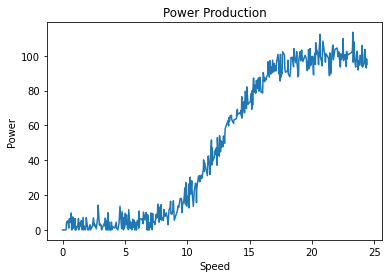

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 0s 600us/step - loss: 4325.6397
Epoch 2/500
16/16 [==============================] - 0s 533us/step - loss: 4182.4912
Epoch 3/500
16/16 [==============================] - 0s 533us/step - loss: 4177.5273
Epoch 4/500
16/16 [==============================] - 0s 533us/step - loss: 4273.5548
Epoch 5/500
16/16 [==============================] - 0s 467us/step - loss: 3993.1317
Epoch 6/500
16/16 [==============================] - 0s 533us/step - loss: 3828.7475
Epoch 7/500


16/16 [==============================] - 0s 600us/step - loss: 118.2027
Epoch 185/500
16/16 [==============================] - 0s 600us/step - loss: 112.8495
Epoch 186/500
16/16 [==============================] - 0s 533us/step - loss: 100.4760
Epoch 187/500
16/16 [==============================] - 0s 533us/step - loss: 104.8982
Epoch 188/500
16/16 [==============================] - 0s 533us/step - loss: 101.6517
Epoch 189/500
16/16 [==============================] - 0s 600us/step - loss: 100.0994
Epoch 190/500
16/16 [==============================] - 0s 533us/step - loss: 111.9440
Epoch 191/500
16/16 [==============================] - 0s 533us/step - loss: 92.5632
Epoch 192/500
16/16 [==============================] - 0s 533us/step - loss: 93.6357
Epoch 193/500
16/16 [==============================] - 0s 533us/step - loss: 90.3202
Epoch 194/500
16/16 [==============================] - 0s 533us/step - loss: 87.8974
Epoch 195/500
16/16 [==============================] - 0s 533us/step - l

16/16 [==============================] - 0s 533us/step - loss: 16.9597
Epoch 377/500
16/16 [==============================] - 0s 533us/step - loss: 15.2746
Epoch 378/500
16/16 [==============================] - 0s 533us/step - loss: 17.2517
Epoch 379/500
16/16 [==============================] - 0s 533us/step - loss: 16.4510
Epoch 380/500
16/16 [==============================] - 0s 533us/step - loss: 16.6585
Epoch 381/500
16/16 [==============================] - 0s 600us/step - loss: 17.3983
Epoch 382/500
16/16 [==============================] - 0s 600us/step - loss: 17.1304
Epoch 383/500
16/16 [==============================] - 0s 467us/step - loss: 15.4069
Epoch 384/500
16/16 [==============================] - 0s 467us/step - loss: 17.7254
Epoch 385/500
16/16 [==============================] - 0s 533us/step - loss: 19.5544
Epoch 386/500
16/16 [==============================] - 0s 533us/step - loss: 17.7369
Epoch 387/500
16/16 [==============================] - 0s 600us/step - loss: 17

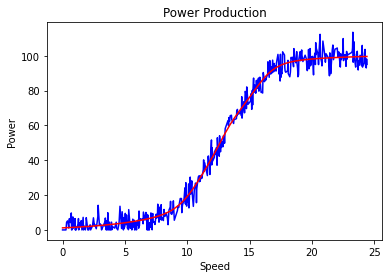

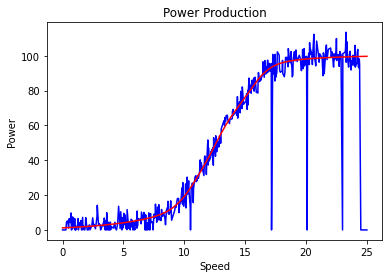

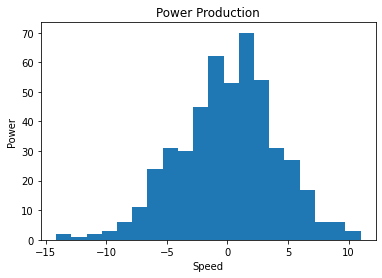

In [1]:
#Import tensorflow
import tensorflow.keras as k
from tensorflow.keras.layers import Dense

#Import ScikitLearn
from sklearn.preprocessing import StandardScaler
import joblib

#Basic Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

#Import the csv file
df = pd.read_csv("./Data/powerproduction.csv")

# feature engineering
df["speed2"] = np.sqrt(df["speed"])

#Add small value to deal with log of 0
df["speed_log"] = np.log(df["speed"] + 0.000001)

#Convert from pandas series to a numpy array
X = df[["speed"]].values
y = df["power"].values

#Make sure Y is a single dimensional list by reshaping it
y = np.reshape(y, y.shape[0])

#Find where Y = 0 but only when the speed is greater than 7
#If doing feature engineering update X to take the first column
bad_index_y = np.where(y == 0)[0]
bad_index_x = np.where(X > 7)[0]

bad_index = np.intersect1d(bad_index_y, bad_index_x)

#Delete the bad indicies
X_fix = np.delete(X, bad_index, axis = 0)
y_fix = np.delete(y, bad_index)

#Add labels to the plot
plt.title('Power Production')
plt.xlabel('Speed')
plt.ylabel('Power')

# investigate data
plt.plot(X_fix, y_fix)
plt.show()

#Reshape X to ensure that its in the correct format for the model
#If doing feature engineering update '1' to number of features
X_fix = np.reshape(X_fix, (-1, 1))

#Scale our features
scaler = StandardScaler()
scaler.fit(X_fix)

X_trans = scaler.transform(X_fix)

#Declare the keras model
model = k.models.Sequential()

#3 nodes , from trial and error was the ideal number of nodes
model.add(Dense(4, activation="sigmoid", input_shape = (X_trans.shape[1],)))
#Set the bias equal to false as its our output
model.add(Dense(1, activation="linear", use_bias=False))

#I used the Adam optimizer as it converged quicker than sgd,
# and I used the keras Adam optimizer object so I could experiment with the learning rate
opt = k.optimizers.Adam(lr=0.01)
model.compile(loss = "mse", optimizer=opt)

#Investigate structure of model to ensure its correct
model.summary()

#Fit the model for 500 epochs
model.fit(X_trans, y_fix, epochs=500)


#Save the trained model to disk
model.save("model.h")
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)


y_pred = model.predict(X_trans)

#Add labels to the plot
plt.title('Power Production')
plt.xlabel('Speed')
plt.ylabel('Power')

#Plot the fixed model against the predicted model 
plt.plot(X_fix, y_fix, c="b")
plt.plot(X_fix, y_pred, c="r")
plt.show()

X_all = scaler.transform(X)
y_pred_all = model.predict(X_all)

#Add labels to the plot
plt.title('Power Production')
plt.xlabel('Speed')
plt.ylabel('Power')

#Plot the predicted data against the raw data
plt.plot(X, y, c="b")
plt.plot(X, y_pred_all, c="r")
plt.show()

y_pred = np.reshape(y_pred, (y_pred.shape[0], ))
difference = y_pred - y_fix

#Plot a  histogram of the difference between the predicted and fixed models
plt.title('Power Production')
plt.xlabel('Speed')
plt.ylabel('Power')


plt.hist(difference, bins = 20)
plt.show()